# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [50]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [51]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
def max_element(arr):
    # Your code here
    zero = arr == 0
    print(arr[1:][zero[:-1]].max())
max_element(x)

5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [52]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
def nearest_value(X, v):
    # Your code here
    X = X.ravel()
    Xv = np.abs(X - v).argmin()
    return X[Xv]
print(nearest_value(X, v))

4


Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [53]:
def scale(X):
    # Your code here
    for i in range(len(X[0])):
        for j in range(len(X)):
            try:
                X[j,i]=(X[j,i]-np.mean(X[:,i]))/np.std(X[:,i])
            except:
                X[j,i] = 0
    print(X)
scale(np.random.randint(10, 20, size=(4, 4)))

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [54]:
N = np.random.normal(10,1,size=(2,2))
def get_stats(X):
    # Your code here
    print(np.linalg.det(X))
    print(np.linalg.matrix_rank(N))
    print(str(np.min(X))+'<-->'+str(np.max(X)))
    print(np.linalg.norm(X,ord='fro'))
    print(np.linalg.eig(X))
    print(np.linalg.inv(X))
    print(np.trace(X))
get_stats(N)

-1.5204339136460594
2
8.639517405342799<-->10.359178516323917
18.920864236485258
(array([-0.08069224, 18.84238196]), array([[-0.74369835, -0.73307913],
       [ 0.66851535, -0.68014336]]))
[[-6.26824228  6.81330403]
 [ 5.68227091 -6.07145204]]
18.76168972378538


Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [55]:
for exp_num in range(100):
    # Your code here
    N1 = np.random.normal(0,1,size=(10,10))
    N2 = np.random.normal(1,0,size=(10,10))
N = np.dot(N1,N2)
A = np.min(N)
B = np.max(N)
print(np.quantile(N,0.95))

3.3340584972788925


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [56]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('2008.csv')
da = pd.read_csv('airports.csv')

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [57]:
# Your code here
print('A = carrier, B = weather, C = NAS, D = security')
print(df.groupby('CancellationCode')['Cancelled'].count())

A = carrier, B = weather, C = NAS, D = security
CancellationCode
A    563
B    549
C    299
Name: Cancelled, dtype: int64


 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [58]:
# Your code here
df1 = df['Distance']
print(df1.sum()/len(df1))
print(df1.mean())
print(df1.min())
print(df1.max())

724.5082571428571
724.5082571428571
31
4962


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [59]:
# Your code here
df2 = df[df.Distance == 31][['Year','Month','DayofMonth','FlightNum']]
print(df2)
print(df[(df.FlightNum == 64)|(df.FlightNum == 65)][['DayofMonth','Month','Year','Distance']].sort_values(by=['DayofMonth','Month','Year']))

       Year  Month  DayofMonth  FlightNum
1116   2008     12          30         65
6958   2008     12          26         65
17349  2008      8          18         64
27534  2008      3          11         64
46082  2008      8           9         65
48112  2008      2          28         64
       DayofMonth  Month  Year  Distance
26109           1      4  2008       571
3869            1      7  2008        82
48020           1     11  2008      1005
39438           2      5  2008       571
13155           2      7  2008      1747
57822           3      5  2008      1747
64319           3      5  2008       414
68338           3      8  2008      2454
9615            4      1  2008       533
30053           4      1  2008        82
64203           4      1  2008        82
65662           4      3  2008       123
69305           5      1  2008      1005
7891            6      4  2008      2381
12980           6      8  2008        82
54909           6     11  2008       581
68264    

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [60]:
# Your code here
a = df.groupby('Origin').count()[['Year']].sort_values(by=['Year'], ascending=False)
print(a.iloc[0])
print(da[da.iata == 'ATL'])

Year    4134
Name: ATL, dtype: int64
    iata                            airport     city state country        lat  \
880  ATL  William B Hartsfield-Atlanta Intl  Atlanta    GA     USA  33.640444   

          long  
880 -84.426944  


In [61]:
# Your code here
print(df[['Origin','AirTime']].groupby('Origin').mean().sort_values(by=['AirTime'], ascending=False).head(1))

        AirTime
Origin         
SJU       205.2


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [62]:
# Your code here
b = df[['Origin', 'DepDelay']].groupby(by=['Origin']).count().sort_values(by=['DepDelay'], ascending=False)
print(b[b.DepDelay > 1000])

        DepDelay
Origin          
ATL         4079
ORD         3391
DFW         2730
DEN         2353
LAX         2064
PHX         2011
LAS         1773
IAH         1770
DTW         1588
SFO         1374
EWR         1343
MCO         1324
SLC         1313
MSP         1233
CLT         1229
JFK         1172
BOS         1128
SEA         1114
LGA         1114
BWI         1018
PHL         1007


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [63]:
# Your code here
import pandas as pd
df = pd.read_csv('2008.csv')
print(df.isnull().values.any())
d = df.isnull().sum()
print('Сумма пропущенных значений =',d.sum())
print(np.count_nonzero(df.isnull().values.sum(axis=1)))
print(np.count_nonzero(df.isnull().values.sum(axis=0)))

True
Сумма пропущенных значений = 355215
70000
16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [64]:
# Your code here
print('Пропущенные значения в целевой переменной: ',df['DepDelay'].values.any())
nan = df[(df.DepDelay.isnull() == True)|(df.DepDelay != 0)]['DepDelay'].sum()
dfd = df['DepDelay']
df = df.drop(['DepDelay'], axis='columns')
df = df.fillna(0)
dfd = dfd.fillna(0)

Пропущенные значения в целевой переменной:  True


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [65]:
# Your code here
for a in ['DepTime','CRSDepTime','ArrTime','CRSArrTime']:
    df[a+'_Hour'] = df[a]//100
    df[a+'_Minute'] = df[a]%100
df = df.drop(['DepTime','CRSDepTime','ArrTime','CRSArrTime'],axis='columns')

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [66]:
# Your code here
#Исключаются потому что имеют много пропусков
print(df.drop(['CancellationCode','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], 1))
#Исключаются по заданию
print(df.drop(['TailNum','Year'],1))

       Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0      2008      6          18          3            WN        242  N699SW   
1      2008      6           4          3            XE       2380  N15980   
2      2008      8           3          7            WN       1769  N464WN   
3      2008      1          23          3            OO       3802  N465SW   
4      2008      5           4          7            WN        399  N489WN   
5      2008      1           3          4            B6        834  N640JB   
6      2008      3          31          1            WN       1589  N387SW   
7      2008      4          22          2            DL        617   N3765   
8      2008      3           4          2            WN        454  N633SW   
9      2008     10           6          1            UA        270  N421UA   
10     2008     11          16          7            WN       3596  N325SW   
11     2008      3           6          4            AA        4

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

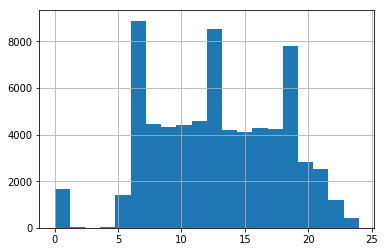

In [67]:
df['DepTime_Hour'].hist(bins=20)

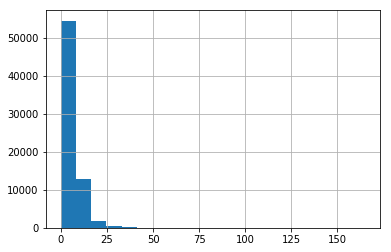

In [68]:
df['TaxiIn'].hist(bins=20)

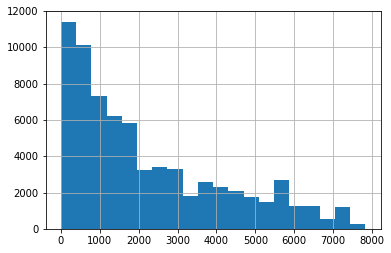

In [69]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [70]:
from sklearn.preprocessing import StandardScaler as ss
def transform_data(data):
    # Your code here
    for c in data.columns:
        if data[c].dtype.name == 'object':
            data[c].fillna('nan')
        else:
            data[c].fillna(0)
    data = pd.get_dummies(data)
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [71]:
# Your code here
df = transform_data(df)

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [72]:
# Your code here
from sklearn.model_selection import train_test_split as tts
df_train, df_test, dfd_train, dfd_test = tts(df,dfd,test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [73]:
# Your code here
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
df_train2, df_test2, dfd_train2, dfd_test2 = df_train[:1000], df_test[:1000], dfd_train[:1000], dfd_test[:1000]
reg = lr().fit(df_train2, dfd_train2)
print(reg.score(df_train2,dfd_train2))
print(reg.intercept_)
print(reg.coef_)
df_pred = reg.predict(df_train2)
tst_pred = reg.predict(df_test2)
print(mse(dfd_train2, df_pred), r2(dfd_train2, df_pred))
print(mse(dfd_test2, tst_pred), r2(dfd_test2, tst_pred))

1.0
-4.277973879678958
[-1.16701229e-03 -5.09156273e-01 -9.47968736e-03 ... -5.43689487e+00
 -7.18277818e+00  5.01179481e+00]
6.460137412647939e-23 1.0
175.5460895096415 0.905406190627801


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [74]:
# Your code here
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
cv = KFold(n_splits=2)
r = LassoCV(cv=2, random_state=42).fit(df_train2, dfd_train2)
print(r.score(df_train2, dfd_train2))
print(r.predict(df_train2))
clf = RidgeCV(alphas=[1, 1, 1, 1]).fit(df_train2, dfd_train2)
print(clf.score(df_train2, dfd_train2))

0.9462942091415065
[ 1.15829627e+02 -7.00511086e+00 -7.55324428e+00 -1.33025612e+01
  7.95707463e-01 -3.66960114e-02 -4.13391257e+00  6.04455784e+00
  2.34295769e+01 -1.60448652e+00  7.30400994e+01  3.30761804e+01
  9.28975507e+00  1.01635558e+02  1.59843164e+01 -2.55639622e+00
  1.92393752e+00  6.61891913e+00 -6.98780927e-01  8.72741906e+00
 -4.63226907e+00 -2.43018952e+00 -5.78189806e+00  5.63993980e+00
 -3.70150237e+00 -2.46170583e+00 -7.04190020e+00 -4.39843828e+00
 -2.20234640e+00 -1.56572392e+00  7.10504779e-01  1.47261157e+00
 -4.21298893e+00 -5.00369229e+00 -3.13854057e+00 -3.41864127e-01
  9.18000104e+00 -7.76344264e+00 -2.75044153e+00  1.85464937e-01
  8.48979853e+01  9.98122800e+00  4.19459941e+01  1.57052589e+00
  1.22766300e+01 -4.68902530e+00  1.29890890e+00  2.63262311e+02
 -7.53687481e+00 -5.43187544e+00 -2.46124267e+00  2.55671475e+01
  6.79120633e+00  2.76467348e+01 -2.34010670e+00  8.08835540e+00
 -3.74677317e+00 -5.46056300e+00  1.03762917e+02 -5.56005205e+00
 -1.02

0.9903576962542506


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [75]:
# Your code here
df['sign']=1
dfd['sign']=1

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [76]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X,w)
    pass

In [77]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    MSPE = (y - make_pred(X, w)) / y
    return np.dot(MSPE, MSPE) / y.shape[0]
    pass

In [78]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    M = (y - make_pred(X, w)) / y
    S= np.dot(X.T, M / y)
    return -2 * S / y.shape[0]
    pass

In [79]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    L = (y - make_pred(X, w)) / y
    return np.dot(L, L) / y.shape[0] + np.dot(w, w)
    pass

In [80]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return get_grad(w, X, y) + 2 * w
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [81]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    # Your code here
    arr = []
    for i in range(0, max_iter, 1):
        if np.linalg.norm(w0) > eps:
            if is_reg:
                w0 = w0 - step_size * get_reg_grad(w0, X, y)
                arr.append(get_reg_func(w0, X, y))
            else:
                w0 = w0 - step_size * get_grad(w0, X, y)
                arr.append(get_func(w_new, X, y))
    return w0, arr

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [82]:
# Your code here
df_train2 = df_train[:5768]
dfd_train2 = dfd_train[:5768]
w1, a = grad_descent(df_train2, dfd_train2, np.zeros(df_train2.shape[1]), 1, 1, 0.001, False)
print(w1, a)

[0. 0. 0. ... 0. 0. 0.] []


**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

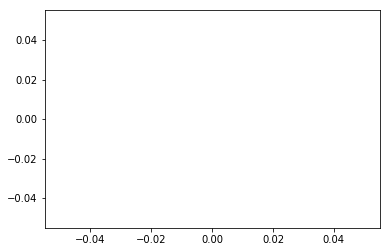

In [83]:
# Your code here
import matplotlib.pyplot as plt
plt.figure()
w2, L = grad_descent(df_train2, dfd_train2, np.zeros(df_train2.shape[1]), 1, 1, 0.1, False)
plt.plot(range(len(L)), L, 'rs')

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [84]:
def sgd(X, y, w0, step_size, max_iter, eps, is_reg):
    # Your code here
    X0 = X.iloc[0].values.reshape(1, -1)
    y0 = np.asarray(y.iloc[0]).reshape(1, -1)[0,:]
    arr2 = []
    for i in range(max_iter):
        if np.linalg.norm(w0) > eps:
            ii = np.random.randint(0, high=X.shape[0], size=1)[0]
            X1 = X.iloc[ii].values.reshape(1, -1)
            y1 = np.asarray(y.iloc[ii]).reshape(1, -1)[0,:]
            if is_reg:
                w0 = w0 - step_size * get_reg_grad(w0, X1, y1)
                arr2.append(get_reg_func(w0, X1, y1))
            else:
                w0 = w0 - step_size * get_grad(w0, X1, y1)
                arr2.append(get_func(w0, X1, y1))
    return w0, arr2

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan, ..., nan, nan, nan])

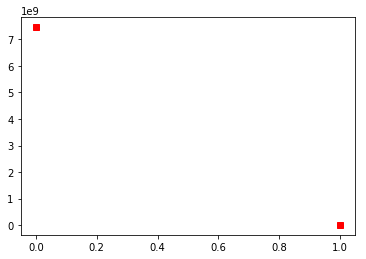

In [85]:
# Your code here
ww = np.random.rand(df_train.shape[1])
ff = plt.figure()
aa = ff.add_subplot(1, 1, 1)
ww, L2r = sgd(df_train, dfd_train, ww, 0.0003, 20000, 0.0001, True)
plt.plot(range(len(L2r)), L2r, 'rs')
ww, L2 = sgd(df_train, dfd_train, ww, 0.008, 20000, 0.0001, False)
plt.plot(range(len(L2)), L2, 'rs')
preds = make_pred(df_test, ww)
preds

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

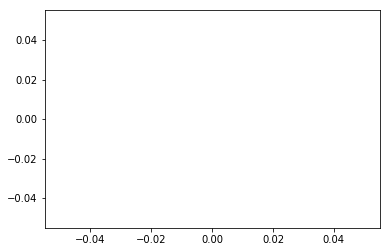

In [86]:
# Your code here
fff = plt.figure()
ww, L3 = sgd(df_train, dfd_train, ww, 0.0003, 20000, 0.0001, False)
plt.plot(range(len(L3)), L3, 'rs')
w_opt, Loss = sgd(df_train, dfd_train, ww, 0.008, 20000, 0.0001, True)
plt.plot(range(len(L3)), L3, 'rs')

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [88]:
# Your code here
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(df_train, dfd_train)
c = linreg.coef_
p = linreg.predict(df_test)
print(c)
print(p)

[ 3.77454339e-10  4.43931907e-03 -1.14896391e-03 ... -2.69452889e+07
 -2.69452865e+07 -2.69452852e+07]
[ 22.69580966  86.87362266  40.86627477 ... 269.50595593   4.00586587
  37.37045759]


Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.